# FML Project
# Spotify Recommendation App

__________________________________
## Name: Gautam Gupta
## Roll no: 17
## Reg No: 230957050
_____________________________________
## Name: Manit Das
## Roll no: 33
## Reg No: 230957106
__________________________________

## Importing Libaries

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Displaying the information for each of the datasets

In [19]:
df = pd.read_csv('dataset.csv')
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
artist_data = pd.read_csv('data_by_artist.csv')
print(df.info())
print(genre_data.info())
print(year_data.info())
print(artist_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Purpose of this Heatmap: 
This visualization helps to analyze how energy levels in music tracks change over different durations and years.

<AxesSubplot:title={'center':'Energy over Time'}, xlabel='duration_ms', ylabel='year'>

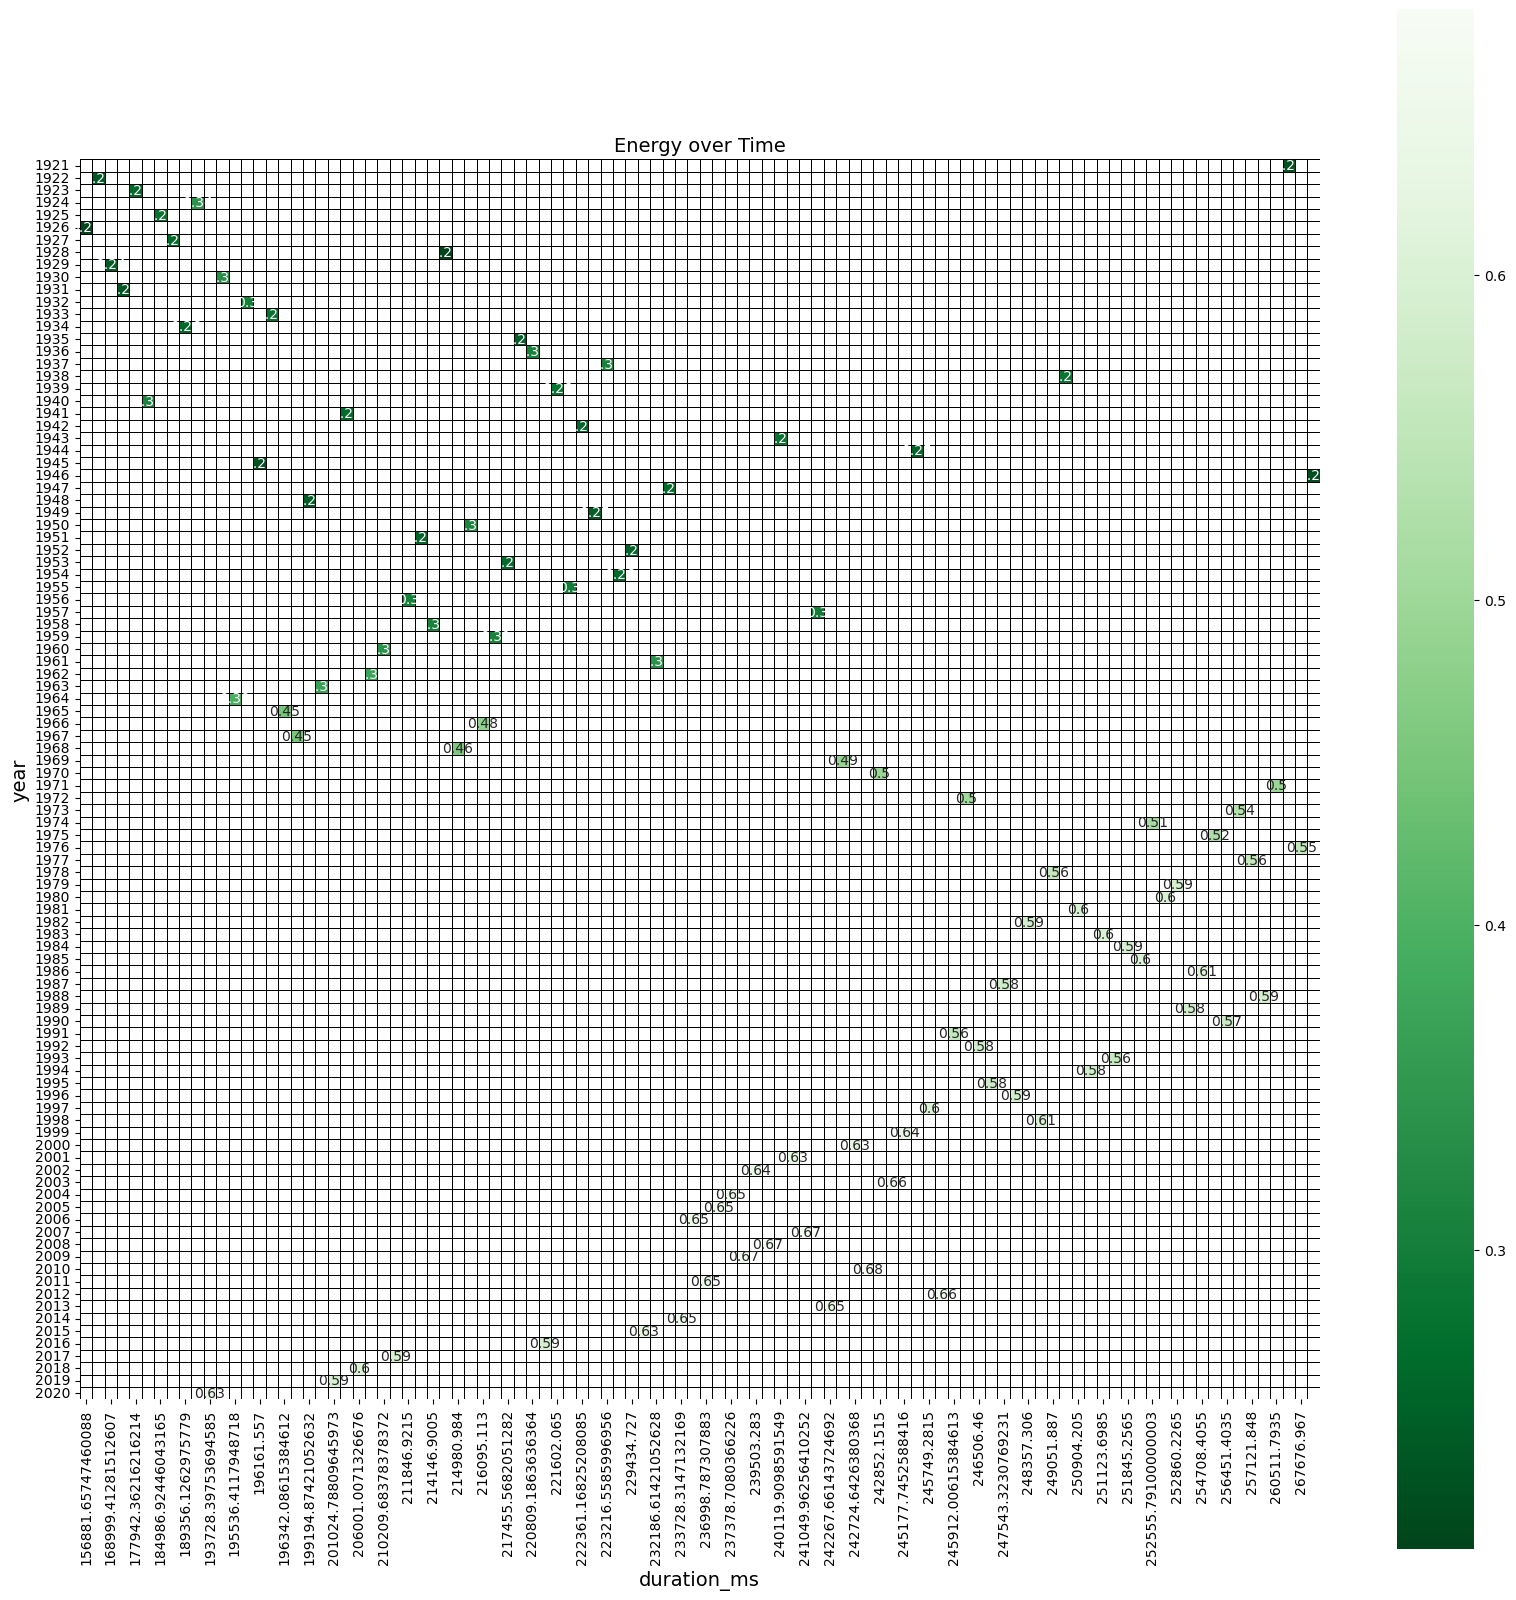

In [20]:
pivot_table = year_data.pivot_table(values='energy', index='year', columns='duration_ms')

plt.figure(figsize=(20, 20))
plt.xlabel('Year', size=14)
plt.ylabel('Duration (ms)', size=14)
plt.title('Energy over Time', size=14)

sns.heatmap(pivot_table, annot=True, linewidths=0.4, linecolor='black', square=True, cmap='Greens_r', cbar=True)


In [21]:
df = pd.read_csv('dataset.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now calculate correlation
corr = numeric_df.corr()
corr


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.003444,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,0.076840,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


# Boxplot Analysis: Popularity vs Explicit Content
## **Purpose of this Visualization:**
This helps in understanding whether explicit tracks are generally more or less popular compared to non-explicit tracks.

Text(0.5, 0.98, '')

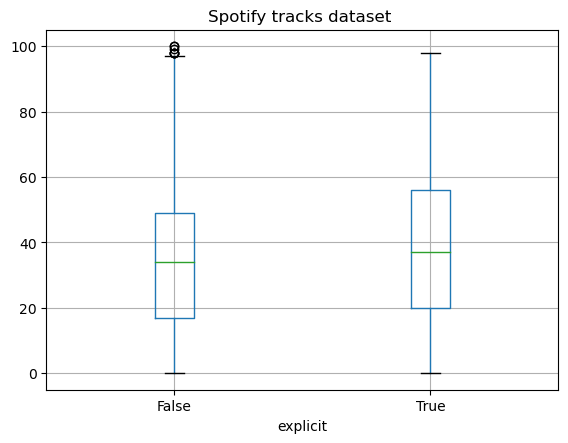

In [22]:
plot_df = pd.read_csv('dataset.csv')
plot_df.head()
plot_df['explicit'].value_counts(dropna = False)
plot_df.boxplot(column='popularity', by ='explicit')
plt.title('Spotify tracks dataset ')
plt.suptitle('')

# Boxplot Analysis: Explicit Content vs Popularity
## **Purpose of this Visualization:**
This boxplot helps in **analyzing the distribution of popularity** for explicit and non-explicit tracks. It shows the **median, interquartile range, and potential outliers**, allowing us to compare the popularity levels between explicit and non-explicit songs.

<AxesSubplot:xlabel='explicit', ylabel='popularity'>

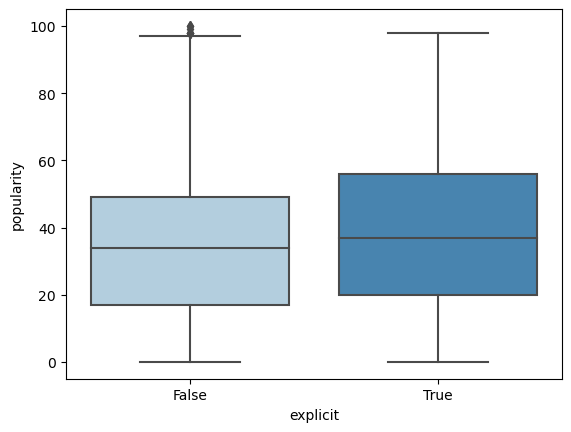

In [23]:
 sns.boxplot(x='explicit', y='popularity', data=plot_df, palette='Blues' )


# Regression Plot: Duration vs Popularity
## **Purpose of this Visualization:**
This plot helps in **analyzing the relationship between the duration of a track and its popularity**, showing the trend and potential correlation between them.

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

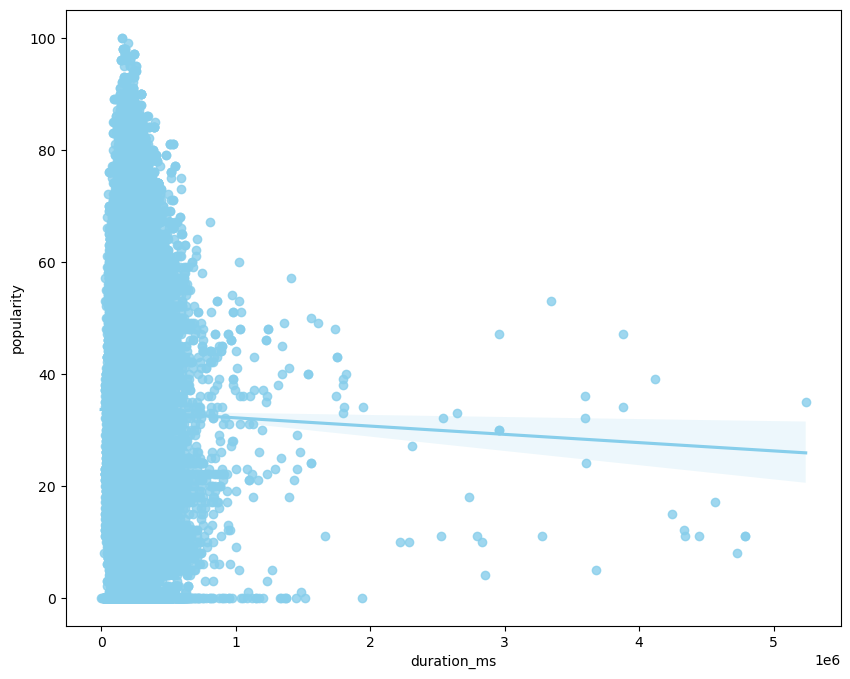

In [24]:
data = pd.read_csv('dataset.csv')

# Convert columns to numeric (if stored as string)
data['duration_ms'] = pd.to_numeric(data['duration_ms'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=['duration_ms', 'popularity'])

# Plot the regplot
plt.figure(figsize=(10,8))
sns.regplot(x=data['duration_ms'], y=data['popularity'], color="Skyblue", truncate=True)

# Removing Outliers and Plotting Cleaned Boxplot

<AxesSubplot:xlabel='explicit', ylabel='popularity'>

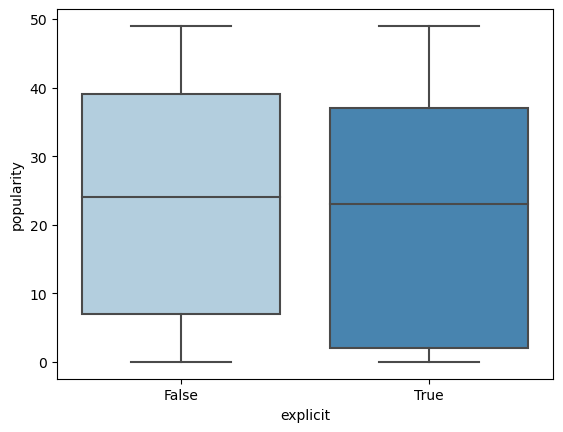

In [25]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 = 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls
index_list = []
for feature in ['popularity']:
    index_list.extend(outliers(plot_df, feature))
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
cleaned_df = remove(plot_df, index_list)
sns.boxplot(x='explicit', y='popularity', data = cleaned_df, palette='Blues')

# Basic Data Exploration and Plotting
## **Purpose of this Code:**
This code gives a **quick statistical overview** of the dataset and **visualizes the distribution of multiple features** like **popularity, energy, tempo, and loudness**. However, a simple `plt.plot()` might not be the best way to visualize this data, as the scale of each feature varies significantly.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


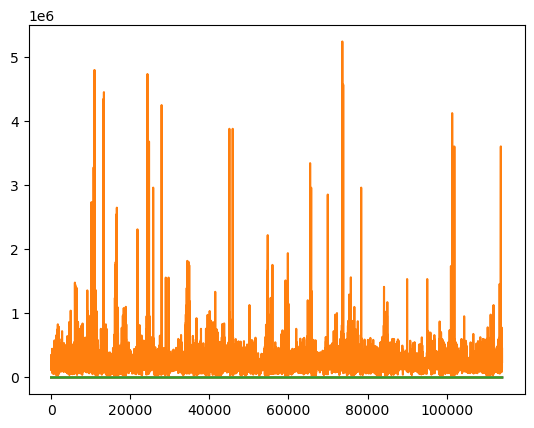

<Figure size 1000x1000 with 0 Axes>

In [26]:
data = pd.read_csv('dataset.csv')
data.head()
data.columns
data = data[['popularity','duration_ms','danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
data.head()
mean = np.mean(data)
std = np.std(data)
plt.plot(data)
plt.figure(figsize=(10,10))
plt.show()

# 🎯 Scatter Plot: Time Signature vs Duration
## 🎯 **Purpose of this Code:**
This plot **visualizes the relationship between the time signature of a track and its duration**. It helps identify patterns or unusual trends between these two features.

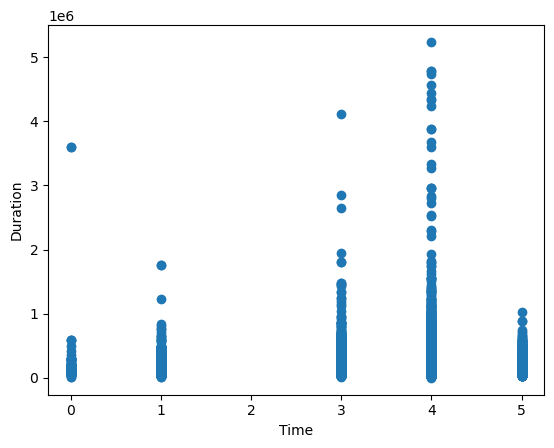

<Figure size 1000x1000 with 0 Axes>

In [27]:
data = pd.read_csv('dataset.csv')
data = data[['time_signature', 'duration_ms']]
data = pd.DataFrame(data)

plt.scatter(df['time_signature'], df['duration_ms'])
plt.xlabel('Time')
plt.ylabel('Duration')
plt.figure(figsize=(10,10))
plt.show()

# Loading and Viewing the Dataset
## **Purpose of this Code:**
This step is **essential for data exploration**. It allows us to **inspect the structure of the dataset**, check for missing values, and understand the features (columns) present in the dataset.

In [28]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# 🎯 Removing Duplicates and Extracting Numeric Features
## 🎯 **Purpose of this Code:**
This step is done to **remove duplicate songs from the dataset** and **extract only numeric features for further analysis**, such as **correlation, clustering, or machine learning models**.

In [29]:
df = df.drop_duplicates(subset=['track_name', 'artists'], keep='first')
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']
numeric_df = df[features]

In [30]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Fitting a K-Nearest Neighbors (KNN) Model
## **Purpose of this Code:**
The KNN model is being trained to **find the 20 most similar songs** based on audio features. This will be helpful for building a **Spotify song recommendation system**.

In [31]:
# Fit KNN model
knn = NearestNeighbors(n_neighbors=20, algorithm='auto')
knn.fit(scaled_data)

NearestNeighbors(n_neighbors=20)

# Spotify Song Recommendation System Using KNN

## **What is Happening in this Code?**
### Step 1: Filter the Song
- The dataset `df` is filtered to **find the song** that matches the input `song_name`.
- Sorting by **popularity** ensures that the **most popular version of the song** is selected.

### Step 2: Extract the Song's Features
- Extract the **numerical features (like energy, danceability, tempo, etc.)** and **reshape them into a vector**.
- **Scale the features** using the `scaler.transform()` function to ensure that the values are normalized.

### Step 3: Find Nearest Neighbors
- Using the **KNN model (`knn.kneighbors`)**, the **closest songs** based on audio features are found.

### Step 4: Filter Songs by Genre
- Filter the **recommended songs to only include tracks from the same genre** as the input song.

### Step 5: Boost Similarity for Songs from the Same Artist
- Add a **similarity score column** and **boost the score by 1.2x** if the artist is the same as the input song's artist.

### Step 6: Sort the Recommendations
- Sort the songs by **similarity score** and **popularity** in descending order.

### Step 7: Fill with Additional Songs (if less than 5)
- If **fewer than 5 songs** are found, **fill the remaining slots with other songs from the same genre**, sorted by popularity.

## **Purpose of this Code:**
The function recommends **the most similar songs based on audio features**, **boosting songs from the same artist**, and **ensuring genre consistency**, similar to **Spotify's recommendation algorithm**.


In [32]:
# Function to recommend similar songs with genre, popularity, and artist weight boost
def recommend_song(song_name):
    # Filter the dataset to get the song
    song = df[df['track_name'].str.lower() == song_name.lower()].sort_values(by='popularity', ascending=False).head(1)

    if song.empty:
        return "Song not found in the dataset."

    # Get the song's feature vector
    song_features = song[features].values.reshape(1, -1)
    scaled_song = scaler.transform(song_features)

    # Find nearest neighbors
    distances, indices = knn.kneighbors(scaled_song)

    # Get the recommended songs
    recommended_songs = df.iloc[indices[0]]

    # Filter by the same genre
    recommended_songs = recommended_songs[recommended_songs['track_genre'] == song['track_genre'].values[0]]

    # Remove the original song and exact same songs from the recommendations
    recommended_songs = recommended_songs[(recommended_songs['track_name'].str.lower() != song_name.lower()) | (recommended_songs['artists'] != song['artists'].values[0])]

    # Boost songs from the same artist
    recommended_songs['similarity_score'] = 1.0
    recommended_songs.loc[recommended_songs['artists'] == song['artists'].values[0], 'similarity_score'] *= 1.2

    # Sort by similarity score and popularity
    recommended_songs = recommended_songs.sort_values(by=['similarity_score', 'popularity'], ascending=[False, False])

    # If less than 5 songs, fill with other songs from the same genre
    if len(recommended_songs) < 5:
        additional_songs = df[df['track_genre'] == song['track_genre'].values[0]].sort_values(by='popularity', ascending=False)
        recommended_songs = pd.concat([recommended_songs, additional_songs]).drop_duplicates().head(5)

    return recommended_songs[['track_name', 'artists', 'track_genre', 'popularity']]

# Example Usage of the Spotify Song Recommendation System
## **Purpose of this Code:**
This allows the **user to manually input a song name** and get **Spotify-like song recommendations based on audio features and genre matching**.

In [33]:
if __name__ == "__main__":
    song_name = input("🎵 Enter a song name: ")

    recommended_songs = recommend_song(song_name)
    
    if isinstance(recommended_songs, str): 
        print(recommended_songs)
    else:
        print("\n🎶 Recommended Songs for:", song_name)
        print("-" * 50)
        for index, row in recommended_songs.iterrows():
            print(f"🎧 {row['track_name']} by {row['artists']} ({row['track_genre']}) | Popularity: {row['popularity']}")
        print("-" * 50)


🎵 Enter a song name: Die with a smile
Song not found in the dataset.
